In [1]:
import pandas as pd

In [17]:
gd = pd.read_excel(r"C:\Users\Administrator\Downloads\weather_forecast.xlsx")
gd

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [19]:
gd_encode = pd.get_dummies(gd,columns = ['Outlook','Temperature','Humidity','Windy'],dtype='int')
gd_encode

,Play,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Windy_Strong,Windy_Weak
0,No,0,0,1,0,1,0,1,0,0,1
1,No,0,0,1,0,1,0,1,0,1,0
2,Yes,1,0,0,0,1,0,1,0,0,1
3,Yes,0,1,0,0,0,1,1,0,0,1
4,Yes,0,1,0,1,0,0,0,1,0,1
5,No,0,1,0,1,0,0,0,1,1,0
6,Yes,1,0,0,1,0,0,0,1,1,0
7,No,0,0,1,0,0,1,1,0,0,1
8,Yes,0,0,1,1,0,0,0,1,0,1
9,Yes,0,1,0,0,0,1,0,1,0,1


In [31]:
x = gd_encode.drop('Play',axis =1)
x

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Windy_Strong,Windy_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [51]:
y = gd_encode['Play'].apply(lambda x :1 if x=='Yes' else 0)
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [69]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9, 10) (5, 10) (9,) (5,)


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtc= DecisionTreeClassifier() #building model
dtc.fit(x_train,y_train) #model training
y_pred = dtc.predict(x_test)

In [79]:
y_pred

array([1, 0, 0, 1, 1], dtype=int64)

In [93]:
from sklearn.metrics import classification_report
#test acc
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [95]:
#train acc
y_train_pred = dtc.predict(x_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [97]:
dtc= DecisionTreeClassifier(criterion='entropy') #building model
dtc.fit(x_train,y_train) #model training
y_pred = dtc.predict(x_test)

In [99]:
y_pred

array([1, 0, 0, 1, 1], dtype=int64)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [103]:
y_train_pred = dtc.predict(x_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [107]:
from sklearn import tree

[Text(0.4, 0.875, 'Humidity_High <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = yes'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes'),
 Text(0.6, 0.625, 'Outlook_Sunny <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = no'),
 Text(0.4, 0.375, 'Windy_Strong <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = yes'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no')]

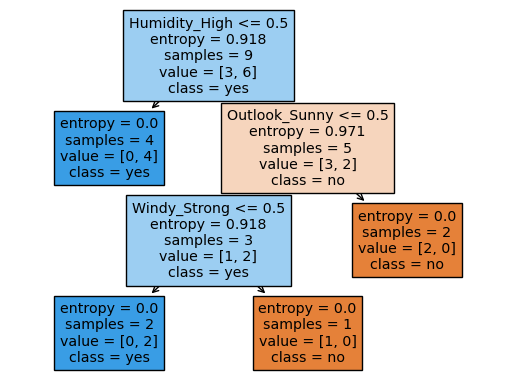

In [111]:
tree.plot_tree(dtc,feature_names=list(x.columns),class_names=['no','yes'],filled = True)